# KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### simple knn

In [2]:
data_x = np.random.random(20)*10
raw_data_x = data_x.reshape(10,-1)
raw_data_x

array([[6.00608468, 5.51606884],
       [2.22313853, 0.26044565],
       [8.72355779, 8.43694659],
       [3.56366401, 3.00199305],
       [2.41957001, 3.06640524],
       [6.67895663, 8.54108364],
       [7.7515624 , 7.18545595],
       [3.49910092, 2.49612714],
       [5.25421079, 3.02440678],
       [3.51682262, 5.26781862]])

In [3]:
data_y1 = np.zeros(5)
data_y2 = np.ones(5)
raw_data_y = np.append(data_y1,data_y2)
raw_data_y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [4]:
x_train = raw_data_x # 特征矩阵
y_train = raw_data_y # 特征向量

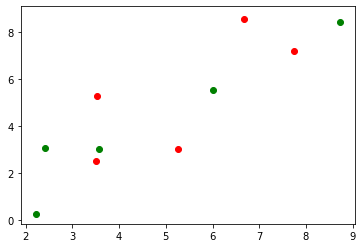

In [5]:
# plt.scatter(x_train[:,:1],x_train[:,1:2])
# x_train[y_train==0,0]
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],color = "g")
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color = "r")

In [6]:
x = np.array([6.09,6.36])  # 新数据

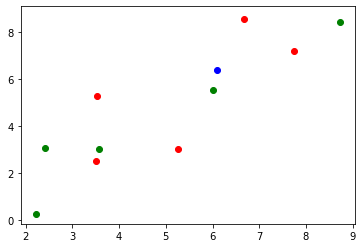

In [7]:
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],color = "g")
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color = "r")
plt.scatter(x[0],x[1],color = 'b')

### knn

In [8]:
from math import sqrt
distances = []
for x_tr in x_train: 
    d =sqrt( np.sum( (x_tr - x)**2 ))  #   ( x_tr[0] - x[0]) **2 + ( x_tr[1] - x[1]) **2
    distances.append(d)
    
    

In [9]:
distances

[0.848092907084835,
 7.221992860718396,
 3.3540026545349466,
 4.202211821568579,
 4.931513232516891,
 2.259202462923196,
 1.8553078221242052,
 4.6521254890536605,
 3.438709897432468,
 2.7953715340203047]

In [10]:
distances = [sqrt( np.sum( (x_tr - x)**2 )) for x_tr in x_train ] # 列表生成式

In [11]:
distances

[0.848092907084835,
 7.221992860718396,
 3.3540026545349466,
 4.202211821568579,
 4.931513232516891,
 2.259202462923196,
 1.8553078221242052,
 4.6521254890536605,
 3.438709897432468,
 2.7953715340203047]

In [12]:
np.argsort(distances) # 返回索引排序

array([0, 6, 5, 9, 2, 8, 3, 7, 4, 1])

In [13]:
nearest = np.argsort(distances) #k=6 则 取前三个
k = 3
topK_y = [y_train[i] for i in nearest[:k]]  # 前 k 个元素的 y 值

In [14]:
topK_y

[0.0, 1.0, 1.0]

In [15]:
from collections import Counter
Counter(topK_y) # 统计 topK_y 中 元素出现的次数

Counter({0.0: 1, 1.0: 2})

In [16]:
votes = Counter(topK_y)
votes.most_common(1) # 返回 出现次数最多的 1 个值

[(1.0, 2)]

In [17]:
predict_y = votes.most_common(1)[0][0] # list 中 第一个 ， 元组中第一个 

In [18]:
predict_y  # 即返回值是对 x[6.09,6.36] 最终预测结果为： 1 

1.0

#### testing fuction


In [19]:
%run KNN/KNN.py

In [20]:
kNN_classify(6,x_train,y_train,x) 

1.0

### scikit-learn  KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier # scikit-learn

In [22]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6) 
kNN_classifier.fit(x_train,y_train) # 拟合


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [23]:
# print(x)
X_predict = x.reshape(1,-1)
X_predict

array([[6.09, 6.36]])

In [24]:
kNN_classifier.predict(X_predict)

array([1.])

In [25]:
y_predict =  kNN_classifier.predict(X_predict)

In [26]:
y_predict[0]

1.0

### new knn classifier

In [31]:
%run KNN/KNNClassifier.py

In [32]:
kNN_clf = KNNClassifier(k=6)
kNN_clf.fit(x_train,y_train)

KNN(k=6)

In [33]:
y_predict = kNN_clf.predict(X_predict)

In [34]:
y_predict[0]

1.0

### 算法测试

In [38]:
from sklearn import datasets

In [39]:
iris = datasets.load_iris()

In [40]:
X = iris.data
y = iris.target

In [45]:
shaffle_indexes = np.random.permutation(len(X)) # 随机 排序 150
shaffle_indexes

array([ 44,  45,  56, 147,  69,  63,  50,  73, 133,  57, 104, 128, 103,
        30,  64, 144,  47, 117, 135,  90,  62,  15,   1,  80,  16,   3,
        28,  37,  34, 126,  97, 105, 124,  52, 108,  85, 115,  60,  10,
       139, 146,  99, 120,  58,  82,  59, 143,  77, 116,  23,  36,  71,
        19, 100,   6,  22,  17, 109,  33,  93,  65,   0, 132,  83,  55,
        29, 129, 149,  18,  75, 141,  46,  61,  11, 114, 127, 140,  41,
        43, 136,  91,  89, 102,  42,  39,  86,  67,  25, 125,  87,  26,
       122, 130,   4,  21,  96,  27,  13, 111,  12,   5,   7, 110,  35,
         9,  72, 101, 142,  54,  95, 134,  32, 148,  31, 131, 123,  79,
        40, 112,  81,  98, 119,  49,  88,  24,  38, 107,  51, 145, 113,
        74,   2,  76,  84,  53,  66,  78,  70,  68,  48, 106, 137,  14,
       118, 138,  20,   8,  92, 121,  94])

In [51]:
test_ratio = 0.2
test_size =int( len(X)*test_ratio ) # 测试数据集 大小
test_size

30

In [55]:
test_indexes = shaffle_indexes[:test_size]
train_indexes = shaffle_indexes[test_size:]
X_train = X[train_indexes] # 训练集
y_train = y[train_indexes] # 
X_test = X[test_indexes]   # 测试集
y_test = y[test_indexes]

### slef encapsulation package

In [58]:
from KNN.model_selection import train_test_split

In [59]:
 X_train, y_train, X_test, y_test = train_test_split(X,y)

In [64]:
from KNN.KNNClassifier import KNNClassifier

In [67]:
my_kNNclf = KNNClassifier(k=3)

In [69]:
my_kNNclf.fit(X_train, y_train)

KNN(k=3)

In [73]:
y_predict = my_kNNclf.predict(X_test)
y_predict

array([1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 1, 1, 1, 1])

In [74]:
y_test

array([1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 1, 1, 2, 1])

In [75]:
sum(y_predict == y_test) # 检测 准确率

29

In [78]:
sum(y_predict == y_test) / len(y_test) 

0.9666666666666667

###  train_test_split  of  sklearn 

In [79]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, y_train, X_test, y_test = train_test_split(X,y,test_size=0.2)